In [ ]:
#yolo train/precit + mask generate + density

Yolo을 사용하기 위한 package 설치

In [1]:
# 1. 필수 패키지 설치
!pip install ultralytics -q
from IPython.display import display, Image
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultral

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from glob import glob

# 압축 해제 경로
base_path = "/content/drive/MyDrive/Colab Notebooks/hair_segmentation"

# 각 폴더에 대해 이미지 수 세기
splits = ['train', 'valid', 'test']
for split in splits:
    image_path = os.path.join(base_path, split, 'images')
    image_count = len(glob(os.path.join(image_path, '*')))
    print(f"{split} - 이미지 수: {image_count}")

YOLO 불러오기 + 학습 진행

In [ ]:
model = YOLO('yolov8l-seg.pt')  # 또는 yolov8m-seg.pt, yolov8n-seg.pt 등

100%|██████████| 88.1M/88.1M [00:01<00:00, 67.4MB/s]


In [ ]:
# 4. YOLOv8 세그멘테이션 학습
custom_hyp = {
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'translate': 0.1,
    'scale': 0.5,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.0,
    'copy_paste': 0.0,
}

# 학습
results = model.train(
    data='/content/drive/MyDrive/Colab Notebooks/hair_segmentation/data.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    project='/content/drive/MyDrive/Colab Notebooks/hair_segmentation/train_result_Large',
    name='yolov8-hair-segmentation',
    **custom_hyp  # 이렇게 딕셔너리 언팩 방식으로 하이퍼파라미터 전달
)


In [ ]:
metrics = model.val()
print(metrics)  # mAP50, mAP50-95, IoU 등 포함

In [ ]:
results = model.val(
    data='/content/drive/MyDrive/Colab Notebooks/hair_segmentation/data.yaml',
    split='test',   # ✅ test 이미지와 정답 라벨 비교해서 평가함!
    save=True,
    save_txt=True,
    save_conf=True
)

In [ ]:
model = YOLO('/content/best (3).pt')  # 또는 yolov8m-seg.pt, yolov8n-seg.pt 등

In [ ]:
results = model.val(
    data='/content/drive/MyDrive/Colab Notebooks/hair_segmentation/data.yaml',
    split='test',   #test 이미지와 정답 라벨 비교해서 평가함!
    save=True,
    save_txt=True,
    save_conf=True
)

In [ ]:
test_results = model.predict(
    source='/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test',
    save=True,
    save_txt=True,
    save_conf=True,
    imgsz=640,
    project='/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test',
    name='seg_output_large'  # 결과 폴더 이름
)

segmentation 결과 확인

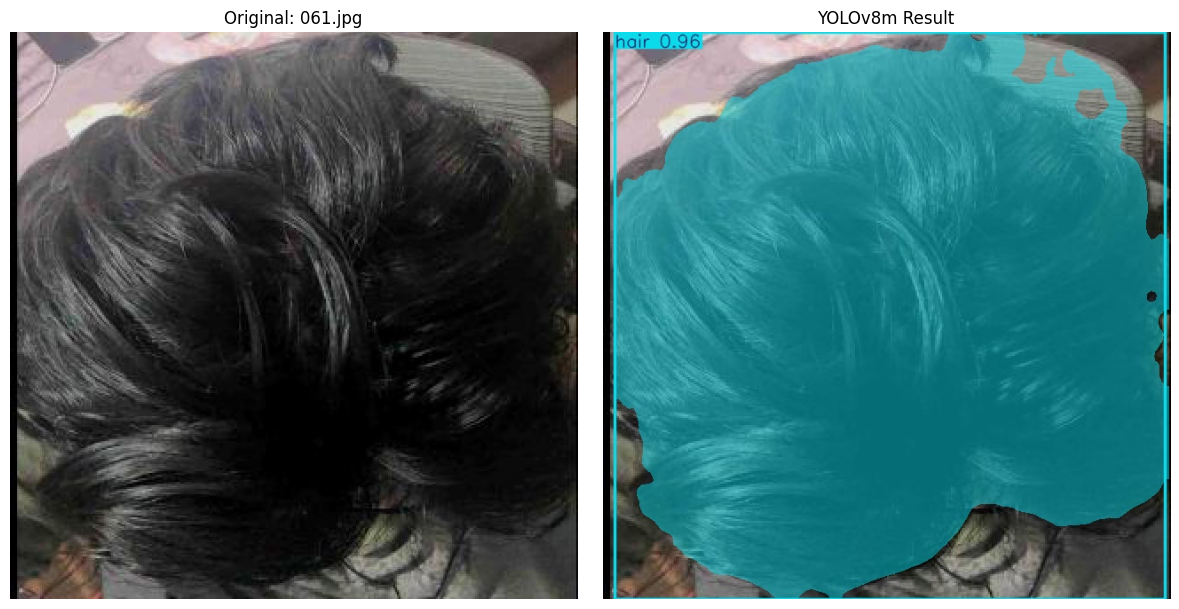

In [3]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# 1. 경로 설정
original_root = Path('/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test')
yolov8m_root = Path('/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test/seg_output')

# 2. 이미지 목록 기준 (원본 이미지)
original_image_paths = sorted(list(original_root.glob("*.jpg")) + list(original_root.glob("*.png")))

# 3. 인덱스 설정
index = 6
if index >= len(original_image_paths):
    raise IndexError(f"index {index}는 이미지 개수 {len(original_image_paths)}를 초과합니다.")

# 4. 파일 경로 추출
original_image_path = original_image_paths[index]
image_name = original_image_path.name
yolov8m_path = yolov8m_root / image_name

# 5. 이미지 로딩
original_image = cv2.imread(str(original_image_path))
original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

if not yolov8m_path.exists():
    raise FileNotFoundError(f"YOLOv8m 결과 없음: {yolov8m_path}")
yolov8m_image = cv2.imread(str(yolov8m_path))
yolov8m_rgb = cv2.cvtColor(yolov8m_image, cv2.COLOR_BGR2RGB)
yolov8m_rgb = cv2.resize(yolov8m_rgb, (original_rgb.shape[1], original_rgb.shape[0]))

# 6. 시각화 (2개 나란히)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title(f"Original: {image_name}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(yolov8m_rgb)
plt.title("YOLOv8m Result")
plt.axis("off")

plt.tight_layout()
plt.show()

predict result로 mask 그리기

In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO

#mask 그린 코드/ 학습 후 result로 바로 그리기
def generate_segmentation_masks(
    image_folder,
    mask_output_dir,
    seg_model,
    conf_thresholds={0: 0.3, 1: 0.5},  # class_id별 confidence
    image_size=640,
    device='cuda'
):
    seg_model.to(device).eval()

    image_folder = Path(image_folder)
    mask_output_dir = Path(mask_output_dir)
    mask_output_dir.mkdir(parents=True, exist_ok=True)

    image_paths = sorted(list(image_folder.glob("*.jpg")) + list(image_folder.glob("*.png")))

    for image_path in image_paths:
        try:
            print(f"Processing: {image_path.name}")

            results = seg_model.predict(source=str(image_path), save=False, imgsz=image_size, conf=0.01, device=device)
            result = results[0]

            mask_h, mask_w = result.orig_shape
            color_mask = np.zeros((mask_h, mask_w, 3), dtype=np.uint8)

            if result.masks is not None:
                masks = result.masks.data.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy().astype(int)
                confs = result.boxes.conf.cpu().numpy()

                for i, (class_id, conf) in enumerate(zip(classes, confs)):
                    if conf < conf_thresholds.get(class_id, 1.0):
                        continue

                    binary_mask = (masks[i] > 0.5).astype(np.uint8)
                    color = (0, 255, 0) if class_id == 1 else (255, 0, 0)  # hair=green, bald=blue

                    for c in range(3):
                        color_mask[..., c][binary_mask == 1] = color[c]

            # 저장
            save_path = mask_output_dir / image_path.name
            cv2.imwrite(str(save_path), color_mask)

        except Exception as e:
            print(f"[ERROR] {image_path.name}: {e}")

In [ ]:
from ultralytics import YOLO

seg_model = YOLO("/content/yolov8_best.pt")

generate_segmentation_masks(
    image_folder="/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test",
    mask_output_dir="/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test/yolo_mask",
    seg_model=seg_model,
    device="cuda"
)

색상이 완벽하게 맞춰지지 않아 png로 변경

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

def normalize_mask_colors(mask_np, green_thresh=150, blue_thresh=150):
    """노이즈 있는 RGB 마스크를 정확한 초록/파랑/검정 RGB로 정제"""
    corrected = np.zeros_like(mask_np)

    green_mask = (mask_np[..., 1] >= green_thresh) & (mask_np[..., 1] > mask_np[..., 2])
    blue_mask = (mask_np[..., 2] >= blue_thresh) & (mask_np[..., 2] > mask_np[..., 1])

    corrected[green_mask] = [0, 255, 0]   # hair
    corrected[blue_mask] = [0, 0, 255]    # bald
    # 나머지는 배경: (0, 0, 0)
    return corrected

def convert_rgb_masks_to_clean_rgb(input_dir, output_dir):
    """노이즈 섞인 RGB 마스크(.jpg)를 class RGB 마스크로 변환 후 저장"""
    os.makedirs(output_dir, exist_ok=True)
    files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png'))]

    for fname in tqdm(files, desc="Generating RGB Class Masks"):
        path = os.path.join(input_dir, fname)
        mask = Image.open(path).convert('RGB')
        mask_np = np.array(mask)

        # 정제된 RGB mask 만들기
        cleaned_rgb_mask = normalize_mask_colors(mask_np)

        # 저장
        save_path = os.path.join(output_dir, fname.replace('.jpg', '.png'))
        Image.fromarray(cleaned_rgb_mask.astype(np.uint8)).save(save_path)

    print(f"총 {len(files)}개 마스크 변환 완료 → RGB class mask로 저장됨: {output_dir}")

In [ ]:
# 입력 폴더: 노이즈 있는 RGB 마스크들 (.jpg/.png)
input_folder = "/content/drive/MyDrive/Colab Notebooks/hair_classification/data/val/yolo_mask"
# 출력 폴더: 정제 후 class mask 저장
output_folder = "/content/drive/MyDrive/Colab Notebooks/hair_classification/data/val/class_mask"

convert_rgb_masks_to_clean_rgb(input_folder, output_folder)

밀도 구하는 방법<br>
1.  class별로 mask에서 모발 영역의 %를 구하기
2. 이상값 제거 후 반복
3. class1의 평균을 100으로 , class7의 평균을 0으로 만들어서 계산

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

def compute_classwise_hair_density_with_std(csv_path, mask_dir):
    df = pd.read_csv(csv_path)
    class_density_list = defaultdict(list)

    for i, row in tqdm(df.iterrows(), total=len(df)):
        filename = row['filename']
        label = int(row['label'])  # 1~7
        mask_path = os.path.join(mask_dir, filename)

        if not os.path.exists(mask_path):
            print(f"[SKIP] {filename} not found")
            continue

        try:
            mask = cv2.imread(mask_path)  # BGR
            if mask is None:
                print(f"[SKIP] Failed to load: {filename}")
                continue

            # Hair (초록): BGR 근사 범위로 추출
            lower_green = np.array([0, 240, 0])
            upper_green = np.array([10, 255, 10])
            hair_mask = cv2.inRange(mask, lower_green, upper_green).astype(bool)

            # ROI: 배경 제외 (거의 검정색)
            roi_mask = np.any(mask > [10, 10, 10], axis=-1)

            hair_pixels = np.sum(hair_mask)
            roi_pixels = np.sum(roi_mask)

            if roi_pixels == 0:
                continue  # ROI가 없으면 스킵

            hair_ratio = hair_pixels / roi_pixels
            class_density_list[label].append(hair_ratio)

        except Exception as e:
            print(f"[ERROR] {filename}: {e}")
            continue

    # 클래스별 평균 및 표준편차 계산
    class_density_result = []
    all_density_for_plot = []

    for label in sorted(class_density_list.keys()):
        ratios = class_density_list[label]
        avg_ratio = np.mean(ratios)
        std_ratio = np.std(ratios)
        class_density_result.append({
            'class': label,
            'avg_hair_ratio': avg_ratio,
            'std_hair_ratio': std_ratio,
            'count': len(ratios)
        })
        all_density_for_plot.append((label, ratios))

    df_result = pd.DataFrame(class_density_result)
    return df_result, all_density_for_plot

In [ ]:
# 경로 설정 예시 (사용자에 맞게 수정하세요)
csv_path = "/content/drive/MyDrive/Colab Notebooks/hair_classification/label/train.csv"
mask_dir = "/content/drive/MyDrive/Colab Notebooks/hair_classification/data/train/class_mask"

# 실행
df_density_stats, classwise_ratios = compute_classwise_hair_density_with_std(csv_path, mask_dir)

In [ ]:
# 결과 출력
print(df_density_stats)

In [ ]:
# Boxplot 시각화
plt.figure(figsize=(10, 6))
data = [ratios for _, ratios in classwise_ratios]
plt.boxplot(data, labels=[f"Class {label}" for label, _ in classwise_ratios], showfliers=True)
plt.title("Hair Density Distribution per Class (with Outliers)")
plt.ylabel("Hair Density (Hair Pixels / Total Pixels)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_density_stats.to_csv("/content/classwise_hair_density_noresize_density.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def process_density_csv_with_iqr_and_score(input_csv, output_csv, show_plot=True):
    df = pd.read_csv(input_csv)

    # 필수 컬럼 확인
    if not {'class', 'avg_hair_ratio', 'std_hair_ratio', 'count'}.issubset(df.columns):
        raise ValueError("CSV에는 'class', 'avg_hair_ratio', 'std_hair_ratio', 'count' 컬럼이 있어야 합니다.")

    # 이상값 제거 함수 (IQR 방식)
    def remove_outliers_iqr(values):
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return [v for v in values if lower <= v <= upper]

    # 클래스별 평균/표준편차 기반으로 가상 분포 생성 → IQR 제거
    filtered_stats = []

    for _, row in df.iterrows():
        label = int(row['class'])
        mean = row['avg_hair_ratio']
        std = row['std_hair_ratio']
        count = int(row['count'])

        # 정규분포 기반 시뮬레이션 (최대 100개 샘플 사용)
        simulated = np.random.normal(loc=mean, scale=std, size=min(100, count))
        filtered = remove_outliers_iqr(simulated)

        filtered_stats.append({
            'class': label,
            'avg_hair_ratio': np.mean(filtered),
            'std_hair_ratio': np.std(filtered),
            'count': len(filtered)
        })

    df_filtered = pd.DataFrame(filtered_stats)

    # 정규화: class 1 = 100, class 7 = 0
    if 1 not in df_filtered['class'].values or 7 not in df_filtered['class'].values:
        raise ValueError("class 1 또는 class 7이 존재하지 않아 정규화 불가합니다.")

    class1_avg = df_filtered[df_filtered['class'] == 1]['avg_hair_ratio'].values[0]
    class7_avg = df_filtered[df_filtered['class'] == 7]['avg_hair_ratio'].values[0]

    df_filtered['density_score'] = df_filtered['avg_hair_ratio'].apply(
        lambda x: max(0, min(100, ((x - class7_avg) / (class1_avg - class7_avg + 1e-6)) * 100))
    )

    # 저장
    df_filtered.to_csv(output_csv, index=False)

    # 시각화
    if show_plot:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='class', y='density_score', data=df_filtered)
        plt.title("Density Score by Class (IQR 정제 후, Class 1 = 100, Class 7 = 0)")
        plt.ylabel("Density Score (%)")
        plt.xlabel("Class")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return df_filtered

In [ ]:
df_result_final = process_density_csv_with_iqr_and_score(
    input_csv="/content/classwise_hair_density_noresize_density.csv",
    output_csv="/content/hair_density_filtered_and_scored.csv",
    show_plot=True
)

In [ ]:
print(df_result_final)

In [ ]:
df_result_final.to_csv("/content/hair_density_filtered_and_scored_percent.csv", index=False)

mask와 밀도 점수 확인 / 100점을 넘으면 class1 평균 이상, 0점보다 낮으면 class7 평균 이하

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def compute_and_visualize_density(image_dir, mask_dir, csv_path, df_density, index=0):
    df = pd.read_csv(csv_path)
    row = df.iloc[index]

    filename = row['filename']
    label = int(row['label'])  # 1~7

    image_path = os.path.join(image_dir, filename)
    mask_path = os.path.join(mask_dir, filename.replace('.jpg', '.png'))

    try:
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('RGB')
        mask_np = np.array(mask)

        # hair: 정확한 초록색 (0,255,0)
        hair_mask = np.all(mask_np == [0, 255, 0], axis=-1)
        roi_mask = np.any(mask_np != [0, 0, 0], axis=-1)

        hair_pixels = hair_mask.sum()
        roi_pixels = roi_mask.sum()

        hair_percent = (hair_pixels / (roi_pixels + 1e-6)) * 100

        # 클래스 평균 밀도 & 점수 계산
        row_density = df_density[df_density['class'] == label].iloc[0]
        class_avg = row_density['avg_hair_ratio']

        class1_avg = df_density[df_density['class'] == 1]['avg_hair_ratio'].values[0]
        class7_avg = df_density[df_density['class'] == 7]['avg_hair_ratio'].values[0]
        abs_score = ((hair_percent - class7_avg) / (class1_avg - class7_avg)) * 100

        # 시각화
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask)
        plt.title("Mask (RGB)")
        plt.axis('off')

        plt.suptitle(
            f"Class {label} | Hair %: {hair_percent:.2f} | Score: {abs_score:.1f} / 100\n"
            f"→ Class {label} Avg: {class_avg:.2f}%", fontsize=12
        )
        plt.tight_layout(rect=[0, 0, 1, 0.9])
        plt.show()

        return {
            'filename': filename,
            'label': label,
            'hair_percent': round(hair_percent, 2),
            'class_avg': round(class_avg, 2),
            'abs_score': round(abs_score, 2)
        }

    except Exception as e:
        print(f"[ERROR] {filename}: {e}")
        return None

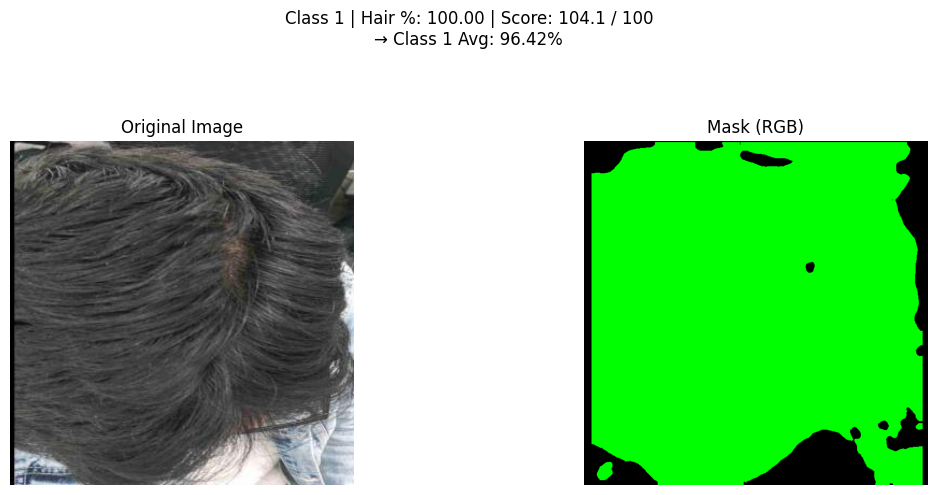

{'filename': '805.jpg', 'label': 1, 'hair_percent': np.float64(100.0), 'class_avg': np.float64(96.42), 'abs_score': np.float64(104.14)}


In [ ]:
# 경로 설정
image_dir = "/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test"
mask_dir = "/content/drive/MyDrive/Colab Notebooks/hair_classification/data/test/class_mask"
csv_path = "/content/drive/MyDrive/Colab Notebooks/hair_classification/label/test.csv"
df_density = pd.read_csv("/content/hair_density_filtered_and_scored_percent.csv")  # class, avg_hair_ratio 포함

# 이미지 인덱스 하나 확인
result = compute_and_visualize_density(image_dir, mask_dir, csv_path, df_density, index=0)
print(result)